In [1]:
import django
import os
import sys
import shutil

path='../'

source_file_path = f'{path}.env'

destination_file_path = '.'

shutil.copy(source_file_path, destination_file_path)

from dotenv import dotenv_values

_config = dotenv_values(".env")
_username = _config["username"]

session_file_path = f'{path}{_username}.session'

# shutil.copy(session_file_path, destination_file_path)


project_path = path  # Adjust this to your actual project path
sys.path.append(project_path)
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'oogway.settings')
django.setup()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'test-all-strategies.csv'

df = pd.read_csv(file_path)

# Filter the data for the required categories
filtered_df = df[df['channel_name'].isin(['CHANNEL_RASTAD', 'CHANNEL_FEYZ', 'CHANNEL_ALI_BEY', 'CHANNEL_KING_CRYPTO', 'CHANNEL_ROSE'])]

# Create a new label column combining 'strategy_name' and 'close_tp'
filtered_df['label'] = filtered_df['strategy_name'] + '_' + filtered_df['close_tp'].astype(str)




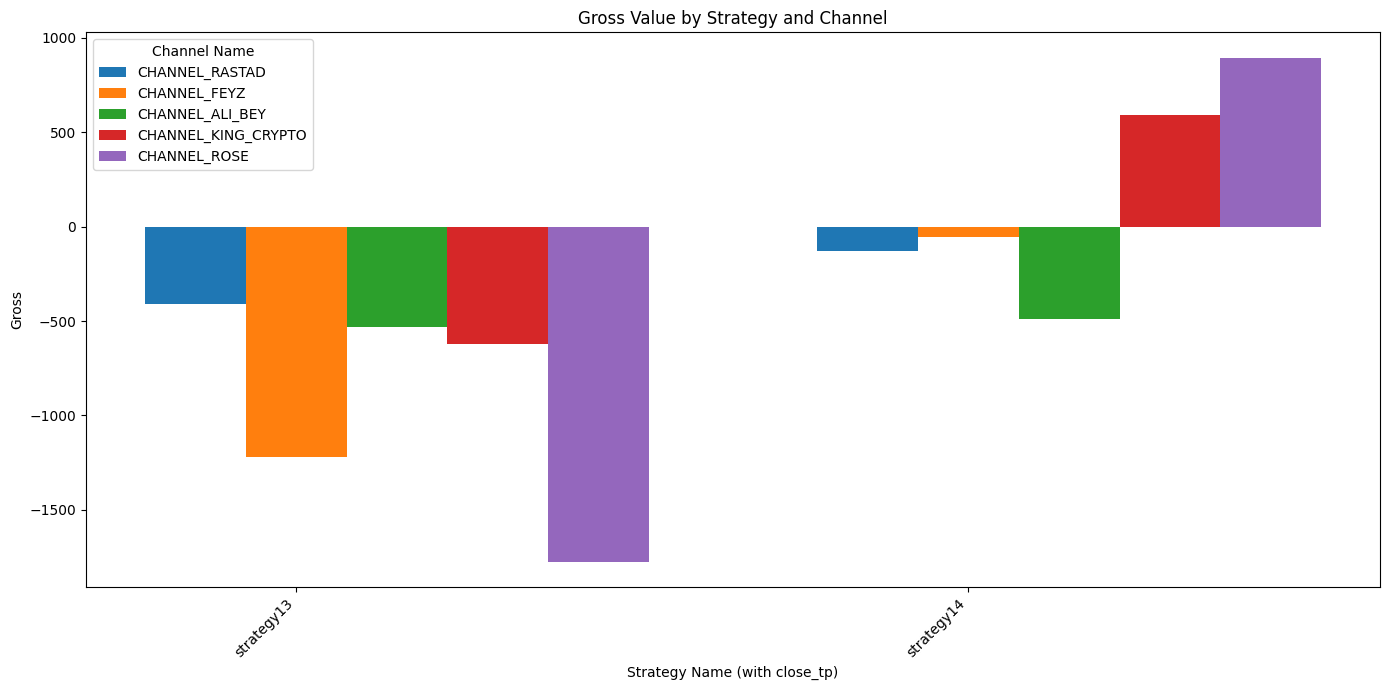

In [3]:
# Separate bar chart for each channel
import numpy as np

# Unique labels for the x-axis
labels = filtered_df['label'].unique()

# Set width for grouped bars
bar_width = 0.15

# Create bar positions
x = np.arange(len(labels))

# Initialize the plot
plt.figure(figsize=(14, 7))

# Plot each channel with its own bars
for i, channel in enumerate(['CHANNEL_RASTAD', 'CHANNEL_FEYZ', 'CHANNEL_ALI_BEY', 'CHANNEL_KING_CRYPTO', 'CHANNEL_ROSE']):
    channel_data = filtered_df[filtered_df['channel_name'] == channel]
    x_values = [x_val for x_val in x if labels[x_val] in channel_data['label'].values]
    plt.bar(np.array(x_values) + i * bar_width, channel_data['gross'].values[:len(x_values)], bar_width, label=channel)

# Customize the chart
plt.title('Gross Value by Strategy and Channel')
plt.xlabel('Strategy Name (with close_tp)')
plt.ylabel('Gross')
plt.xticks(x + bar_width, labels, rotation=45, ha='right')
plt.legend(title="Channel Name")
plt.tight_layout()

# Display the chart
plt.show()



In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv(file_path)

# Filter the data for the required categories
filtered_df = df[df['channel_name'].isin(['CHANNEL_RASTAD', 'CHANNEL_FEYZ', 'CHANNEL_ALI_BEY', 'CHANNEL_KING_CRYPTO', 'CHANNEL_ROSE'])]

# Create a new label column combining 'strategy_name' and 'close_tp'
filtered_df['label'] = filtered_df['strategy_name'] + '_' + filtered_df['close_tp'].astype(str)

# Define channels to plot
channels = ['CHANNEL_RASTAD', 'CHANNEL_FEYZ', 'CHANNEL_ALI_BEY', 'CHANNEL_KING_CRYPTO', 'CHANNEL_ROSE']

# Generate a separate bar chart for each channel
for channel in channels:
    # Filter data for the current channel
    channel_data = filtered_df[filtered_df['channel_name'] == channel]
    
    # Separate positive and negative values
    colors = ['skyblue' if gross >= 0 else 'pink' for gross in channel_data['gross']]
    
    # Plot the bar chart
    plt.figure(figsize=(20, 6))
    bars = plt.bar(channel_data['label'], channel_data['gross'], color=colors)
    
    # Annotate each bar with its value
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 bar.get_height() + (0.02 * max(channel_data['gross'])),  # Adjust for better text placement
                 f'{bar.get_height():.2f}', 
                 ha='center', va='bottom' if bar.get_height() >= 0 else 'top', 
                 fontsize=10)
    
    # Add a horizontal line at y = 0
    plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
    
    # Add labels and titles
    plt.title(f'Percent Gross Value for {channel} ')
    plt.xlabel('Strategy Name (with close_tp)')
    plt.ylabel('Gross')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend()  # Show legend for the y=0 line
    plt.show()


KeyError: 'close_tp'

In [ ]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'test-all-strategies.csv'
data = pd.read_csv(file_path)

# Display rows where 'gross' is not negative
non_negative_gross = data[data['gross'] >= 0]

data.sort_values(by='gross',ascending=False)


,channel_name,strategy_name,close_tp,initial_money,total_opening_orders,total_loss,total_profit,gross,total_pending,my_free_money,my_total_money,profit_count,loss_count,pending_count,missed_count
113,CHANNEL_ROSE,strategy2,1,1000,1236,-1488.00,3150.00,1662.00,25.000000,1390.50,1415.50,1050,186,1,0
114,CHANNEL_ROSE,strategy3,1,1000,1223,-1480.00,3114.00,1634.00,0.000000,1408.50,1408.50,1038,185,0,0
115,CHANNEL_ROSE,strategy4,1,1000,1222,-1480.00,3111.00,1631.00,0.000000,1407.75,1407.75,1037,185,0,0
107,CHANNEL_KING_CRYPTO,strategy3,100,1000,690,-4664.90,6270.52,1605.61,25.000000,1376.40,1401.40,100,590,1,0
108,CHANNEL_KING_CRYPTO,strategy4,100,1000,690,-4720.00,6305.67,1585.67,25.000000,1371.42,1396.42,100,590,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,CHANNEL_ALI_BEY,strategy1,3,1000,537,-9992.33,6781.40,-3210.93,175.000000,22.27,197.27,301,236,7,32
83,CHANNEL_ALI_BEY,strategy12,100,1000,169,-5877.05,2629.18,-3247.87,233.054939,20.34,253.39,26,138,5,351
81,CHANNEL_ALI_BEY,strategy10,100,1000,361,-6955.30,3542.35,-3412.95,123.218743,23.54,146.76,18,341,3,212
82,CHANNEL_ALI_BEY,strategy11,100,1000,163,-5857.59,2418.32,-3439.27,123.179885,17.00,140.18,25,135,3,289
